# GYROPLANE LONGITUDINAL STABILITY SIMULATOR
## Parameters

In [1]:
import numpy
import matplotlib.pyplot as plt
#import ipywidgets
auw = 520 #400*2.2
iyy =100
ir=147
gamma = 9 # hard wired replace with actual formula 
radius = 11 #4.2*3.3*0.976
chord =0.2*3.3
b = 2
a = 5.7
rho = 0.0024
pi = numpy.pi

u = 51#32*3.3
delta = 0.013
theta =4.5*numpy.pi/180
cd = 0.013
thrust = 200
hp = 0
stabLever = 1.6*3.3
stabArea =0
stabLiftSlope = 3.5
h = 1.5*3.3
vcg =-0.42
af = 10
propEff = 0.65
timeInt = 0.01

print (auw, radius, chord, theta,u,pi,theta)

520 11 0.66 0.07853981633974483 51 3.141592653589793 0.07853981633974483


In [2]:
mass = auw/32.4
s = b*chord/(numpy.pi*radius)
A = numpy.pi * radius**2
lamda = -theta/3+1/a*((a*theta/3)**2+a*cd/2)**0.5*0.7935
om = 1/radius*(auw/(s*a/2*(theta/3+lamda/2)*A*rho))**0.5
rrpm = om/(2*numpy.pi)*60
mu = u/(radius*om)
tc = a/4*(2/3*theta*(1+3/2*mu**2)+lamda)
tcAlt = auw/(rho*s*A*om**2*radius**2)
vi = auw/(2*rho*u*A)
aOne = 2*mu*(4*theta/3+lamda)/(1-mu**2/2)
hc = a/2*(mu*delta/(2*a)+aOne*theta/3+0.75*lamda*aOne-0.5*mu*theta*lamda+0.25*mu*aOne**2)
qc = delta*(1+3*mu**2)/8-lamda*tc-mu*hc
w = lamda*om*radius
angle = 0.036
q = 0
thrust2 = 250/(rho*s*A*om**2*radius**2)
longCG = (-thrust2*vcg-hc*h)/tc
alphanf = numpy.arctan(lamda/mu)
currentState = [u,w,q,angle,om,mu,lamda,aOne]
startState = currentState.copy()
print(currentState)
print(tc,hc)
print (longCG)
print (hc*om**2*rho*s*radius**2*A)
print(tc*om**2*rho*s*radius**2*A)
print ( 1/(s*tc/(2*mu**2)+s*delta/(4*mu*s*tc)*(1+0*mu**2)))
uint = u
wint = w
print("tip speed fps", om*radius)


[51, 3.2250417214953946, 0, 0.036, 37.951510384556165, 0.12216545769546867, 0.007725268588107199, 0.02768035188239759]
0.08729166063477618 0.0028804934704675903
0.034716722782303415
17.493964968760064
530.1443203625024
2.401138191042036
tip speed fps 417.46661423011784


In [3]:
def calForcesMoments(state):
    u = state[0];w=state[1];q=state[2];angle=state[3];om=state[4];mu=state[5];lamda=state[6];aOne=state[7]
    hc = a/2*(mu*delta/(2*a)+1/3*aOne*theta+3/4*lamda*aOne-1/2*mu*theta*lamda+1/4*mu*aOne**2)
    tc = a/4*(2/3*theta*(1+3*mu**2/2)+lamda)
    qc = delta*(1+4.7*mu**2)/8-lamda*tc-mu*hc
    #lamda = lamda + s*tc/(2*mu) # correcting lamda as it needs to include lamdai =stc/2mu
    daOnedq = -16/gamma*(1/(1-mu**2/2))
    #print (daOnedq*1000/iyy)
    dhcdq = a/4*(0.5*lamda+mu*aOne-mu**2*theta)*daOnedq
    Xq = -tc*daOnedq*rho*s*A*om*radius**2-dhcdq
    dragX = af*((u**2+w**2)**0.5/1.46)**2/391 * numpy.cos(numpy.arctan(w/u)) 
    dragZ = af*((u**2+w**2)**0.5/1.46)**2/391 * numpy.sin(numpy.arctan(w/u))  
    zStab = -stabArea*numpy.arctan(w/u)*stabLiftSlope*((u**2+w**2)**0.5/1.46)**2/391
    pThrust = hp*550/u*propEff
    x = pThrust - hc*rho*s*A*om**2*radius**2- dragX - mass*q*w - auw*numpy.sin(angle) + q*Xq
    z = auw*numpy.cos(angle)-tc*rho*s*A*om**2*radius**2 + mass*q*u+zStab+dragZ
    #m =-0.1251/3.3*iyy*w-.75*iyy*q
    m = (tc*longCG+hc*h)*rho*s*A*om**2*radius**2+250*vcg-1.55*iyy*q+zStab*stabLever
    tr = -qc*rho*s*A*om**2*radius**3  + q*-4.2*ir
    #print ([x,z,m,tr,tc])
    #print (zStab)
    return [x,z,m,tr,tc]
def calState(state,forces):
    u = state[0]+forces[0]/mass*timeInt
    w = state[1]+forces[1]/mass*timeInt
    q = state[2]+forces[2]/iyy*timeInt
    angle = state[3]+state[2]*timeInt+0.5*forces[2]/iyy*timeInt**2
    om = state[4]+forces[3]/ir*timeInt
    mu = u/(om*radius) 
    lamda = w/(om*radius)+ s*forces[4]/(2*mu)
    aOne = 2*mu*(4*theta/3+lamda)/(1-mu**2/2)
    return [u,w,q,angle,om,mu,lamda,aOne]
    


[51, 3.2250417214953946, 0, 0.036, 37.951510384556165, 0.12216545769546867, 0.007725268588107199, 0.02768035188239759]
[-67.4796769146114, -8.503866224290007, -4.263256414560601e-14, -47.6149362888261, 0.08729166063477618]


/Users/raghu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/raghu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/Users/raghu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
/Users/raghu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars
/Users/raghu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/Users/raghu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/Users/raghu/opt/anaconda3/lib/python3.7/site-packages/i

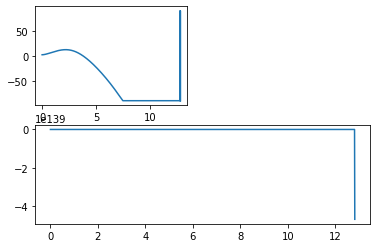

In [4]:
time = numpy.arange(0.0, 60, timeInt)
#time2= numpy.arange(0.0, 60, timeInt)
uVector = []
angleVector = []
RRPMVector = []
print(currentState)
print(calForcesMoments(currentState))
for tick in time:
    forces = calForcesMoments(currentState)
    #print("forces",forces)
    currentState = calState(currentState,forces)
    #print("state",currentState)
    uVector.append (currentState[0])
    RRPMVector.append(currentState[4]*60/(2.0*pi))
    if (abs(currentState[3]*180.0/pi) > 90):
        angleVector.append(90*numpy.sign(currentState[3]))
    else:
        angleVector.append (currentState[3]*180.0/pi)
    
    
        
ax1 = plt.subplot(212)
ax1.plot(time, uVector)
#ax3 = plt.subplot(212)
#ax3.plot(time, RRPMVector)
ax2 = plt.subplot(221)
ax2.plot(time,angleVector)

In [5]:
print(qc*rho*b*chord*radius*om**2*radius**3)
print (currentState)

44.860623985226106
[nan, nan, nan, nan, nan, nan, nan, nan]


In [6]:
#currentState = [105.6, 3.7832480789723406, 0, 0, 36.202468522499835, 0.2156317391498461, 0.007725268588107199, 0.049647666992735956]
#currentState = [52.8, 3.7832480789723406, 0, 0, 36.202468522499835, 0.10781586957492305, 0.007725268588107199, 0.02438846497088551]
#currentState = [105.6, 3.7832480789723406, 0, 0.01, 36.202468522499835, 0.2156317391498461, 0.007725268588107199, 0.049647666992735956]
#currentState[0] = 120; currentState[5]=currentState[0]/(currentState[4]*radius)
#thrust = 0
currentState = startState.copy()

initialForces = calForcesMoments(currentState)
currentState[0]=currentState[0]+0.01*numpy.sin(0.06)
currentState[1]=currentState[1]+0.01*numpy.cos(0.06)
#currentState[1]=currentState[1]+0.1*0.06
currentState[5]=currentState[0]/(radius*currentState[4])
currentState[6]=currentState[6]+0.01*numpy.cos(0.06)/(radius*currentState[4])

currentState[7] = 2*currentState[5]*(4*theta/3+currentState[6])/(1-currentState[5]**2/2)

finalForces = calForcesMoments(currentState)
zw = (finalForces[1]-initialForces[1])/0.01/mass
xw = (finalForces[0]-initialForces[0])/0.01/mass+zw*numpy.sin(0.06)
mw = (finalForces[2]-initialForces[2])/0.01/iyy*3.3
qw = (finalForces[3]-initialForces[3])/0.01/ir*3.3


#currentState = [105.6, 3.7832480789723406, 0, 0, 36.202468522499835, 0.2156317391498461, 0.007725268588107199, 0.049647666992735956]
#currentState = [52.8, 3.7832480789723406, 0, 0, 36.202468522499835, 0.10781586957492305, 0.007725268588107199, 0.02438846497088551]
#currentState = [105.6, 3.7832480789723406, 0, 0.01, 36.202468522499835, 0.2156317391498461, 0.007725268588107199, 0.049647666992735956]
#currentState[0] = 120; currentState[5]=currentState[0]/(currentState[4]*radius)

currentState = startState.copy()
initialForces = calForcesMoments(currentState)
currentState[0]=currentState[0]+0.01*numpy.cos(0.06)
currentState[1]=currentState[1]+0.01*numpy.sin(0.06)
#currentState[1]=currentState[1]+0.1*0.06
currentState[5]=currentState[0]/(radius*currentState[4])
currentState[6]=currentState[6] + 0.01*numpy.sin(0.06)/(radius*currentState[4])

currentState[7] = 2*currentState[5]*(4*theta/3+currentState[6])/(1-currentState[5]**2/2)

finalForces = calForcesMoments(currentState)
zu = (finalForces[1]-initialForces[1])/0.01/mass
xu = (finalForces[0]-initialForces[0])/0.01/mass+zu*numpy.sin(0.06)
mu = (finalForces[2]-initialForces[2])/0.01/iyy*3.3
qu = (finalForces[3]-initialForces[3])/0.01/ir*3.3

#currentState = [105.6, 3.7832480789723406, 0, 0, 36.202468522499835, 0.2156317391498461, 0.007725268588107199, 0.049647666992735956]
#currentState = [105.6, 3.7832480789723406, 0, 0.01, 36.202468522499835, 0.2156317391498461, 0.007725268588107199, 0.049647666992735956]
currentState = startState.copy()

initialForces = calForcesMoments(currentState)
print(initialForces[0])
currentState[2] =currentState[2]+0.01
finalForces = calForcesMoments(currentState)
xq = (finalForces[0]-initialForces[0])/0.01/mass/3.3
zq = (finalForces[1]-initialForces[1])/0.01/mass/3.3
mq = (finalForces[2]-initialForces[2])/0.01/iyy
qq = (finalForces[3]-initialForces[3])/0.01/ir


#currentState = [105.6, 3.7832480789723406, 0, 0, 36.202468522499835, 0.2156317391498461, 0.007725268588107199, 0.049647666992735956]
#currentState = [105.6, 3.7832480789723406, 0, 0.01, 36.202468522499835, 0.2156317391498461, 0.007725268588107199, 0.049647666992735956]
currentState = startState.copy()


initialForces = calForcesMoments(currentState)
factor = 1+ 0.01/currentState[4]
currentState[4] = currentState[4]+0.01
currentState[5] = currentState[5]/factor
currentState[6] = currentState[6]/factor
currentState[7] = 2*currentState[5]*(4*theta/3+currentState[6])/(1-currentState[5]**2/2)

finalForces = calForcesMoments(currentState)
xom = (finalForces[0]-initialForces[0])/0.01/mass/3.3
zom = (finalForces[1]-initialForces[1])/0.01/mass/3.3
mom = (finalForces[2]-initialForces[2])/0.01/iyy
qom = (finalForces[3]-initialForces[3])/0.01/ir

#currentState = [105.6, 3.7832480789723406, 0, 0, 36.202468522499835, 0.2156317391498461, 0.007725268588107199, 0.049647666992735956]
#currentState = [105.6, 3.7832480789723406, 0, 0.01, 36.202468522499835, 0.2156317391498461, 0.007725268588107199, 0.049647666992735956]
currentState = startState.copy()



initialForces = calForcesMoments(currentState)
currentState[3] =currentState[3]+0.01
finalForces = calForcesMoments(currentState)
xtheta = (finalForces[0]-initialForces[0])/0.01/mass/3.3
ztheta = (finalForces[1]-initialForces[1])/0.01/mass/3.3
mtheta = (finalForces[2]-initialForces[2])/0.01/iyy
qtheta = (finalForces[3]-initialForces[3])/0.01/ir

#print (xu,zu,mu,xq,qu)
# print (xw,zw,mw,zq,qw)
print ("u","w","q","theta","om")
print ("{0:10.2f}".format(xu),"{0:10.2f}".format(xw), "{0:10.2f}".format(xq),"{0:10.2f}".format(xtheta),"{0:10.2f}".format(xom))
print("{0:10.2f}".format(zu),"{0:10.2f}".format(zw),"{0:10.2f}".format(zq),"{0:10.2f}".format(ztheta),"{0:10.2f}".format(zom))
print("{0:10.2f}".format(mu),"{0:10.2f}".format(mw),"{0:10.2f}".format(mq),"{0:10.2f}".format(mtheta),"{0:10.2f}".format(mom))
print("{0:10.2f}".format(qu),"{0:10.2f}".format(qw),"{0:10.2f}".format(qq),"{0:10.2f}".format(qtheta),"{0:10.2f}".format(qom))

m = numpy.matrix([[xu,xw,xq,xtheta,xom],[zu,zw,zq,ztheta,zom],[mu,mw,mq,mtheta,mom],[0,0,1,0,0],[qu,qw,qq,qtheta,qom]])
ev = numpy.linalg.eigvals(m)
print (ev)

for root in ev:
    print (2*pi/root.imag,"sec ", 0.69/root.real)

-67.4796769146114
u w q theta om
     -0.11      -0.15      -0.50      -9.81      -0.01
     -0.10      -1.25      15.45      -0.40      -0.48
      0.07       0.19      -1.55       0.00       0.03
      0.04       0.38      -4.20       0.00      -0.03
[-3.09193101+0.j          0.3611235 +0.60514761j  0.3611235 -0.60514761j
 -0.34931638+0.j         -0.22511349+0.j        ]
inf sec  -0.22316151226568845
10.382897050667692 sec  1.910703662671351
-10.382897050667692 sec  1.910703662671351
inf sec  -1.9752867136023113
inf sec  -3.065120642689965


/Users/raghu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: divide by zero encountered in double_scalars


In [7]:
    -0.13      -0.18      -0.04!      -9.70      -0.01*
     -0.11      -1.19       1.16*      -0.05!      -0.50
      0.01      -0.10      -1.50       0.00      -0.00
     -0.11      -0.83       0.00       0.00       0.08   
    
    
    -0.13      -0.18      -0.04      -9.70      -0.03
     -0.11      -1.19       1.16      -0.05      -0.57
      0.01      -0.10      -1.50       0.00       0.03
     -0.11      -0.83       0.00       0.00       0.01

#-0.12737347608323973 -0.17797849137411553 -0.041688684065804116
#-0.11147850943468089 -1.1871341338526131 1.1636363636363607
#0.01453506974142361 -0.10482830395205635 -1.5
#-0.10631363903848426 -0.8283709532022173 0.0


#-0.12737347608323973 -0.11147850943468089 0.01453506974142361 -0.10631363903848426
#-0.17797849137411553 -1.1871341338526131 -0.10482830395205635 -0.8283709532022173

#-0.10567557579253459 -0.11147850943468089 -0.013313410356602974 -0.06723730691937085
#-0.14100696068627802 -1.1871341338526131 -0.15227994317799706 -0.7617938445922403
# -0.11841695292757408 -0.11730117187317483 -0.01528309244410642 -0.06744540238999787
# -0.1400782428741517 -1.2008848534524799 -0.1824907854315037 -0.781586199269445

# -0.10567557579253459 -0.11147850943468089 -0.013313410356602974 -0.020374941490718442
# -0.14100696068627802 -1.1871341338526131 -0.15227994317799706 -0.23084661957340616
#-0.11841695292757408 -0.11730117187317483 -0.01528309244410642 -0.02043800072424178
#-0.14007824287425502 -1.2008848534524799 -0.1824907854315037 -0.2368443028089227



SyntaxError: invalid syntax (<ipython-input-7-640ca5a7f22f>, line 1)

In [ ]:
80*550/100*0.65


In [ ]:
2*a*mu/(8*mu+a*s)*rho*A*s*om*radius

In [ ]:
dragX = af*((u**2+w**2)**0.5/1.46)**2/391 * numpy.cos(numpy.arctan(w/u)) 
dragZ = af*((u**2+w**2)**0.5/1.46)**2/391 * numpy.sin(numpy.arctan(w/u))  
print(dragX,dragZ,angle)
numpy.sin(pi/2)


In [ ]:
print (currentState)

In [ ]:
ev[0].real

In [14]:
mu= 0.15
print (mu)
print (aOne)

0.15
0.02768035188239759
